In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# IVHD

# FMNIST Euclidean (nn=2, 1, 1)

In [31]:
df_fmnist_ivhd_embedding = pd.read_csv('/Users/miloszwloch/Documents/repositories/viskit/viskit_offline/ivhd_fmnistE.txt', sep=',', header=0)
df_fmnist_ivhd_embedding = df_fmnist_ivhd_embedding.iloc[:, :3]
fmnist_ivhd_embedding = df_fmnist_ivhd_embedding.to_numpy()
df_fmnist_ivhd_embedding.head()

,0.486319,-0.118614,9
0,0.486209,-0.118510,9
1,-0.110782,0.726581,0
2,-0.001837,0.573896,0
3,-0.041657,0.351191,3
4,0.042214,0.549138,0


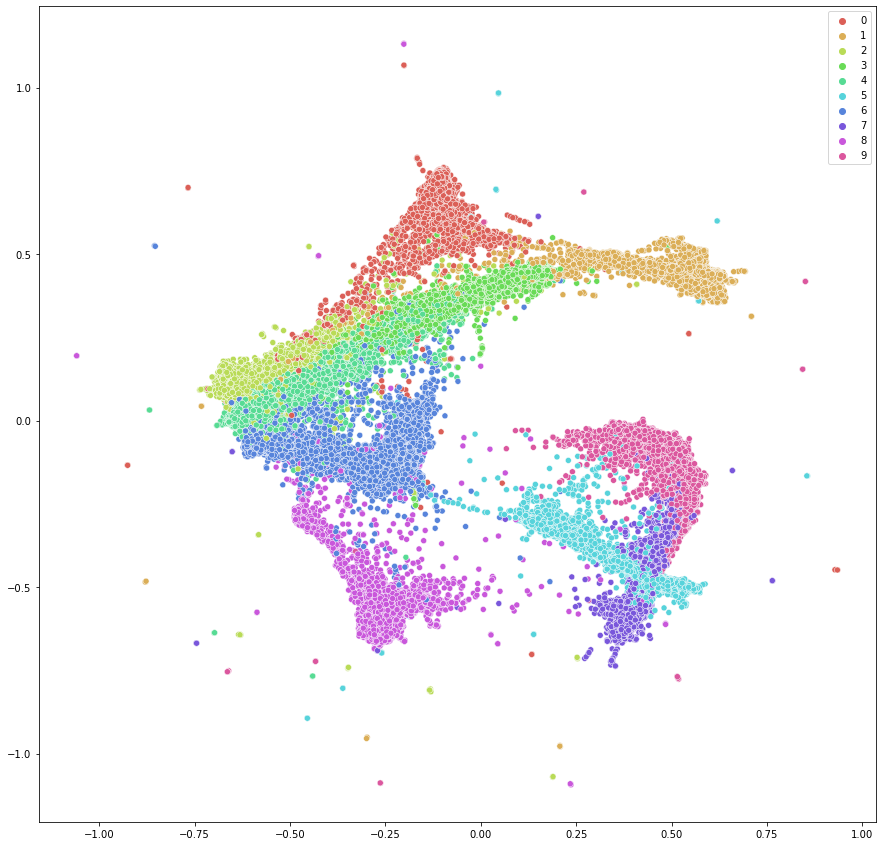

In [32]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = fmnist_ivhd_embedding[:,0], y = fmnist_ivhd_embedding[:,1], 
                hue = fmnist_ivhd_embedding[:,2].astype('int'), palette = sns.hls_palette(10), legend = 'full');

# Reuters Euclidean (i=5000, nn=5)

In [13]:
df_reuters_ivhd_embedding = pd.read_csv('/Users/miloszwloch/Desktop/good/ivhd_reutersE.txt', sep=',', header=None)
df_reuters_ivhd_embedding = df_reuters_ivhd_embedding.iloc[:, :3]
labels = np.array(df_reuters_ivhd_embedding[2].value_counts().keys()[:10])
df_reuters_ivhd_embedding = df_reuters_ivhd_embedding.loc[df_reuters_ivhd_embedding[2].isin(labels)]
reuters_ivhd_embedding = df_reuters_ivhd_embedding.to_numpy()
df_reuters_ivhd_embedding.head()
print(df_reuters_ivhd_embedding.shape)
df_reuters_ivhd_embedding[2].unique()

(795645, 3)


array([ 3,  8,  1,  7, 22, 24,  6, 35, 26, 11])

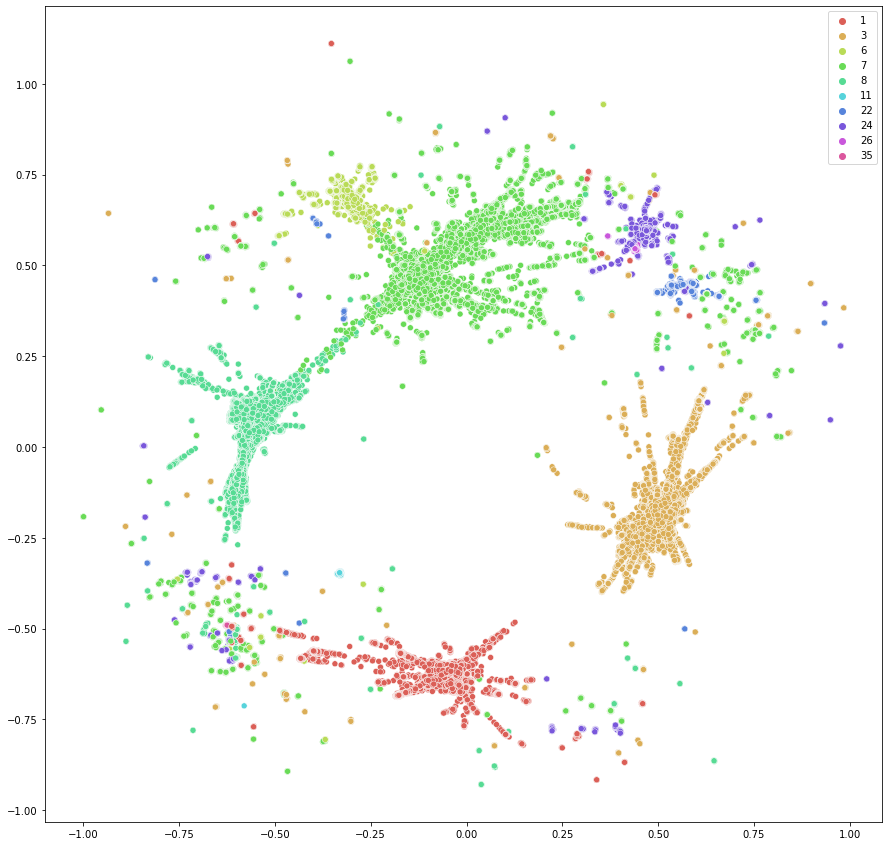

In [54]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = reuters_ivhd_embedding[:,0], y = reuters_ivhd_embedding[:,1], 
                hue = reuters_ivhd_embedding[:,2].astype('int'), palette = sns.hls_palette(10), legend = 'full');

## Smallnorb Cosine (i=6000, nn=20, 1)

In [311]:
df_smallnorb_ivhd_embedding = pd.read_csv('/Users/miloszwloch/Documents/repositories/viskit/viskit_offline/ivhd_smallnorbE.txt', sep=',', header=None)
df_smallnorb_ivhd_embedding = df_smallnorb_ivhd_embedding.iloc[:, :3]
smallnorb_ivhd_embedding = df_smallnorb_ivhd_embedding.to_numpy()
df_smallnorb_ivhd_embedding.head()

,0,1,2
0,-363.020,104.891,0
1,-358.913,101.518,0
2,-415.969,129.225,1
3,-257.443,138.052,2
4,336.903,-104.884,3


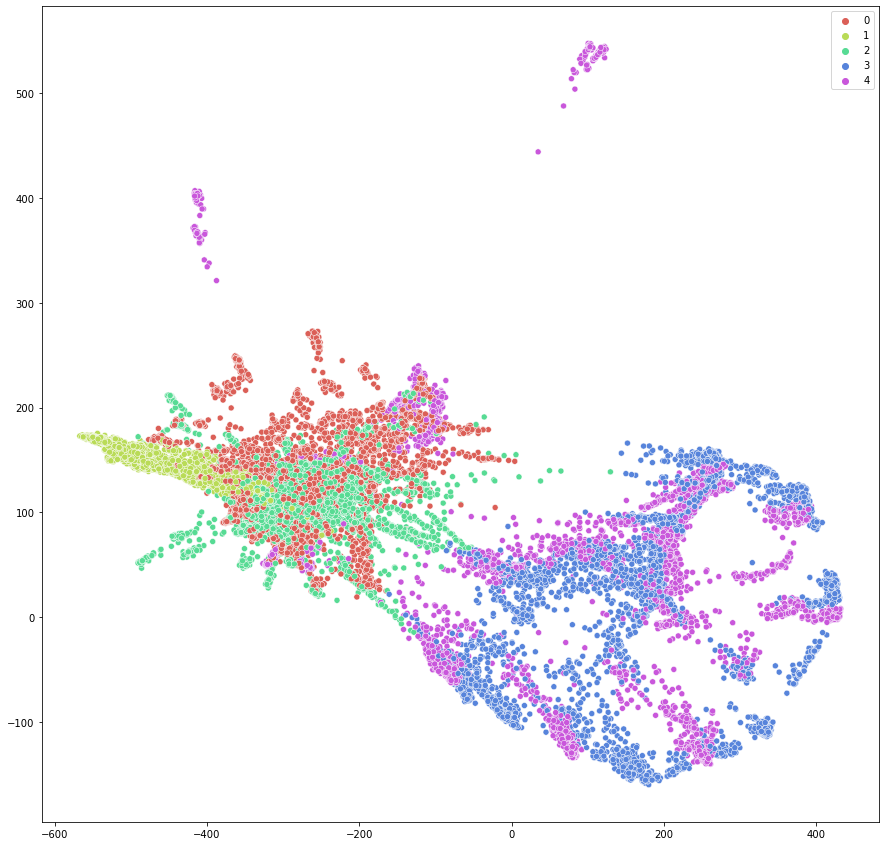

In [312]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.scatterplot(x = smallnorb_ivhd_embedding[:,0], y = smallnorb_ivhd_embedding[:,1], 
                hue =smallnorb_ivhd_embedding[:,2].astype('int'), palette = sns.hls_palette(5), legend = 'full');

# Shepard diagram for FMNIST

In [15]:
df_fmnist = pd.read_csv('ivhd/fmnist.csv', header=None)

indexes = []

labels = df_fmnist.iloc[:,-1].unique()
for label in labels:
    label_sample = df_fmnist.iloc[:,-1][df_fmnist.iloc[:,-1] == label].sample(1000)
    indexes = indexes + list(label_sample.index.values.astype(int))


df_fmnist_embedded = pd.read_csv('/Users/miloszwloch/Documents/repositories/viskit/viskit_offline/ivhd_fmnistE.txt', header=None)
df_fmnist_embedded = df_fmnist_embedded.iloc[:, :2]

In [16]:
df_fmnist_test = df_fmnist.loc[indexes]
df_fmnist_test = df_fmnist_test.iloc[:, :-1]

In [17]:
df_fmnist_test = df_fmnist_test.sort_index()

In [18]:
df_fmnist_embedded

,0,1
0,0.574714,-0.105845
1,0.573732,-0.107781
2,0.071355,0.664503
3,0.080615,0.500285
4,-0.191980,0.426873
...,...,...
69995,0.556548,0.496054
69996,0.599844,-0.136167
69997,0.450230,0.504056
69998,-0.144878,-0.510896


In [19]:
df_fmnist_embedded = df_fmnist_embedded.loc[df_fmnist_embedded.index.isin(list(df_fmnist_test.index))]
df_fmnist_test = df_fmnist_test.reset_index(drop=True)
df_fmnist_embedded = df_fmnist_embedded.reset_index(drop=True)

In [20]:
original_distances = euclidean_distances(df_fmnist_test)
original_distances = np.tril(original_distances).flatten()
original_distances = original_distances[original_distances != 0]

In [21]:
embedded_distance = euclidean_distances(df_fmnist_embedded)
embedded_distance = np.tril(embedded_distance).flatten()
embedded_distance = embedded_distance[embedded_distance != 0]

<AxesSubplot:>

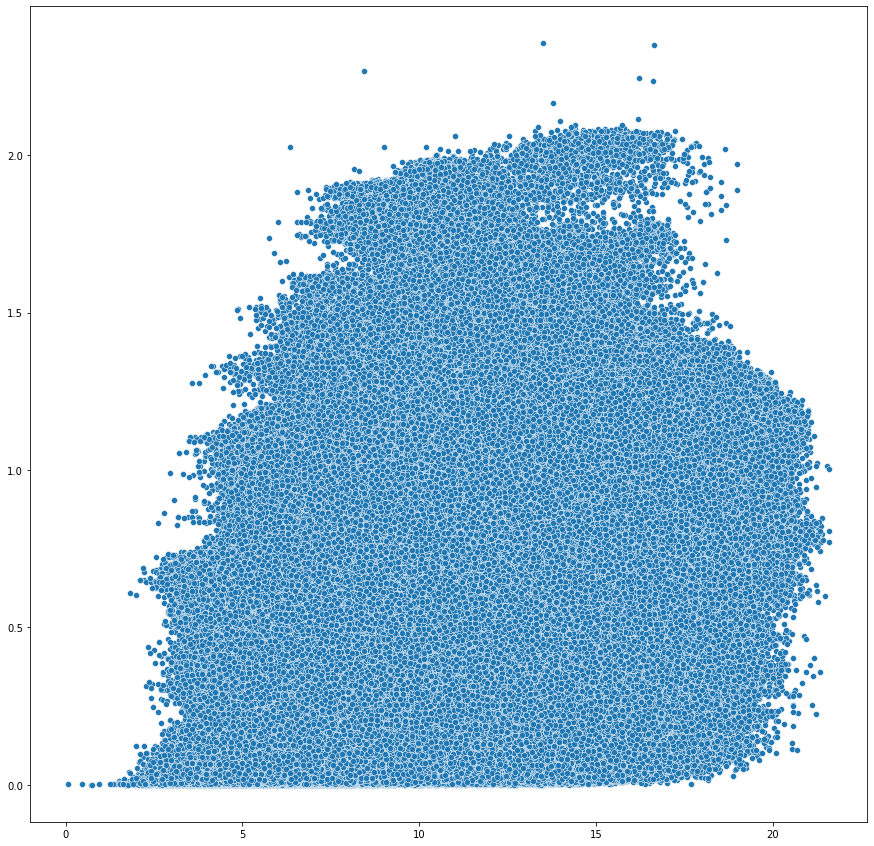

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x = original_distances, y = embedded_distance)

# Shepard diagram for Reuters

In [3]:
df_fmnist = pd.read_csv('ivhd/reuters.csv', header=None)
labels = np.array(df_fmnist.iloc[:, -1].value_counts().keys()[:10])
df_fmnist = df_fmnist.loc[df_fmnist.iloc[:,-1].isin(labels)]

indexes =[]

labels = df_fmnist.iloc[:, -1].unique()
for label in labels:
    label_sample = df_fmnist.iloc[:,-1][ df_fmnist.iloc[:,-1] == label].sample(700)
    indexes = indexes + list(label_sample.index.values.astype(int))

df_fmnist_embedded = pd.read_csv('/Users/miloszwloch/Documents/repositories/viskit/viskit_offline/ivhd_reutersE.txt', header=None)

df_fmnist_embedded = df_fmnist_embedded.iloc[:, :2]

In [5]:
df_fmnist_test = df_fmnist.loc[indexes]
print(df_fmnist_test.iloc[:,-1])
df_fmnist_test = df_fmnist_test.iloc[:, :-1]

703520     3
34562      3
235242     3
184911     3
615938     3
          ..
251795    11
241616    11
77109     11
479941    11
285916    11
Name: 30, Length: 7000, dtype: int64


In [6]:
df_fmnist_test = df_fmnist_test.sort_index()

In [7]:
df_fmnist_embedded = df_fmnist_embedded[df_fmnist_embedded.index.isin(list(df_fmnist_test.index))]
df_fmnist_test = df_fmnist_test.reset_index(drop=True)
df_fmnist_embedded = df_fmnist_embedded.reset_index(drop=True)

In [8]:
df_fmnist_embedded.shape

(7000, 2)

In [9]:
df_fmnist_embedded.shape

(7000, 2)

In [10]:
original_distances = euclidean_distances(df_fmnist_test)
original_distances = np.tril(original_distances).flatten()
original_distances = original_distances[original_distances != 0]

In [11]:
original_distances.shape

(24496500,)

In [12]:
embedded_distance = euclidean_distances(df_fmnist_embedded)
embedded_distance = np.tril(embedded_distance).flatten()
embedded_distance = embedded_distance[embedded_distance != 0]

In [13]:
embedded_distance.shape

(24496500,)

<AxesSubplot:>

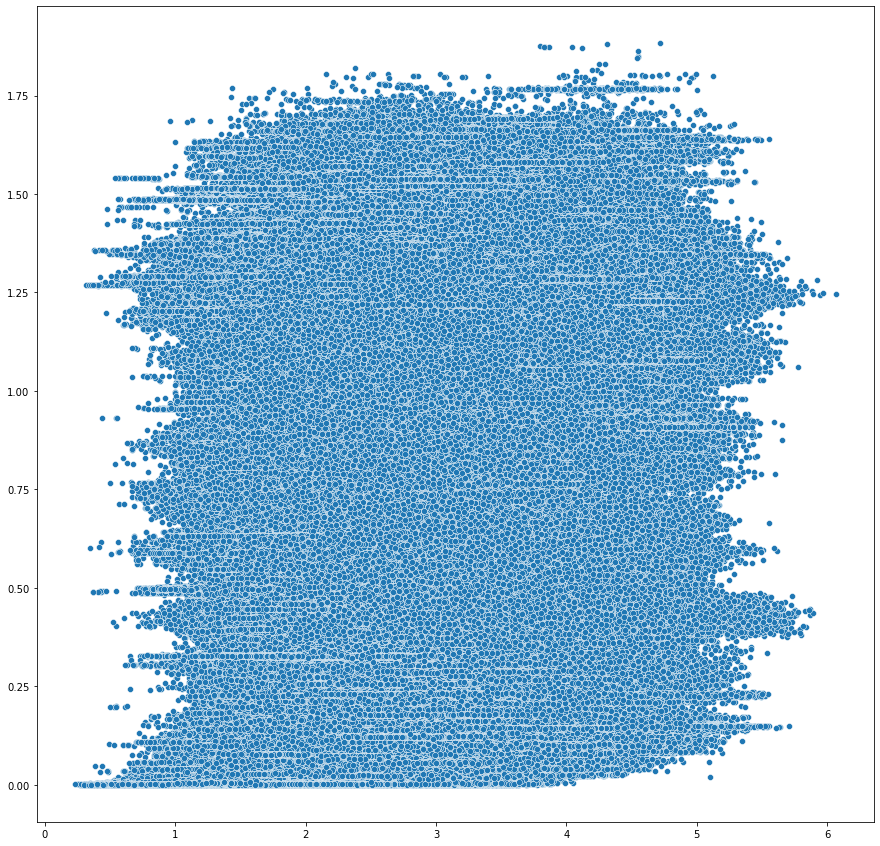

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x = original_distances, y = embedded_distance)

# Shepard for Smallnorb

In [34]:
df_fmnist = pd.read_csv('ivhd/smallnorb.csv', header=None)

indexes =[]

labels = df_fmnist.iloc[:, -1].unique()
for label in labels:
    label_sample = df_fmnist.iloc[:,-1][df_fmnist.iloc[:,-1] == label].sample(1000)
    indexes = indexes + list(label_sample.index.values.astype(int))

df_fmnist_embedded = pd.read_csv('/Users/miloszwloch/Desktop/good/ivhd_smallnorbC.txt', header=None)

df_fmnist_embedded = df_fmnist_embedded.iloc[:, :2]

In [35]:
df_fmnist_test = df_fmnist.loc[indexes]
df_fmnist_test = df_fmnist_test.iloc[:,:-1]

In [36]:
df_fmnist_test

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
18226,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,...,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0
16541,223.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,...,222.0,222.0,223.0,223.0,221.0,221.0,221.0,221.0,222.0,221.0
22336,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,249.0,249.0,249.0,250.0,250.0,251.0,251.0,251.0,250.0,250.0
14681,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,250.0,250.0,251.0,251.0,250.0,250.0,250.0,250.0,250.0,250.0
11266,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,...,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21220,206.0,206.0,206.0,206.0,206.0,206.0,206.0,206.0,206.0,206.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
14955,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0
1645,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,209.0,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0
9830,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0


In [37]:
df_fmnist_test = df_fmnist_test.sort_index()

In [38]:
df_fmnist_embedded = df_fmnist_embedded.loc[df_fmnist_embedded.index.isin(list(df_fmnist_test.index))]
df_fmnist_test = df_fmnist_test.reset_index(drop=True)
df_fmnist_embedded = df_fmnist_embedded.reset_index(drop=True)     

In [39]:
original_distances = euclidean_distances(df_fmnist_test)
original_distances = np.tril(original_distances).flatten()
original_distances = original_distances[original_distances != 0]

In [40]:
embedded_distance = euclidean_distances(df_fmnist_embedded)
embedded_distance = np.tril(embedded_distance).flatten()
embedded_distance = embedded_distance[embedded_distance != 0]

<AxesSubplot:>

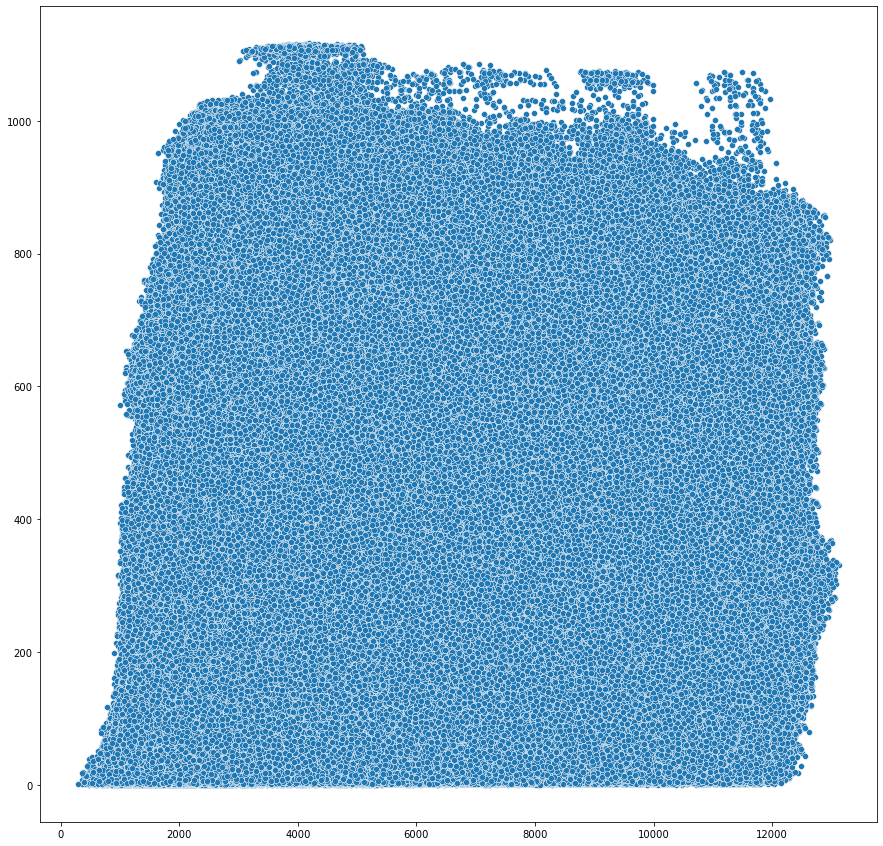

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x = original_distances, y = embedded_distance)